# TP : Construction de modèles prédictifs

Propriétaires d'une chaîne d'établissements de grande distribution, nous souhaitons ouvrir un nouveau magasin dans une ville dans laquelle notre concurrent s'est déjà positionné. 

---

Nous disposons pour cela de quatre tables de données. 

*   Table démographique (`demographic-data.csv`)
*   Table des ventes (`monthly-sales-2010.csv`)
*   Table du recensement de population (`partially-parsed-wy-web-scrape.csv`)
*   Table des concurrents (`competitor-sales.csv`)


# A. Construction d'un modèle de régression


La construction d'un modèle prédictif de régression se déroule en deux temps. 

1.   On établit un modèle avec les données historiques dont on dispose, afin que les liaisons et les corrélations entre les différents attributs (variables) expliquant un attribut-cible soient mises en place. 
2.   Puis, à partir de nouvelles données, non-vues par le premier modèle, on calcule la valeur que doit prendre l'attribut-cible à partir des variables explicatives. 



## i. Traitements sur la base

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Importer les fichiers
demographics = pd.read_csv('https://raw.githubusercontent.com/hyqformat/formation_data_cacec/master/demographics.csv')
total_sales_by_city = pd.read_csv('https://raw.githubusercontent.com/hyqformat/formation_data_cacec/master/total_sales_by_city.csv')
competitors_sales_city = pd.read_csv('https://raw.githubusercontent.com/hyqformat/formation_data_cacec/master/competitors_sales_city.csv')
census_2010 = pd.read_csv('https://raw.githubusercontent.com/hyqformat/formation_data_cacec/master/census_2010.csv')

In [0]:
# Visualiser les en-têtes de chaque table
# demographics.head()
# total_sales_by_city.head()
# competitors_sales_city.head()
# census_2010.head()

In [0]:
# Dimensions de chaque table ? 
print(demographics.shape)
print(total_sales_by_city.shape)
print(competitors_sales_city.shape)
print(census_2010.shape)

(99, 6)
(11, 2)
(17, 2)
(99, 2)


Nous allons à présent consolider les différentes tables, hors données de concurrents.

In [0]:
# Consolider les tables hors compétiteurs
print(demographics.columns)
print(total_sales_by_city.columns)

Index(['City', 'County', 'Land Area', 'Households with Under 18',
       'Population Density', 'Total Families'],
      dtype='object')
Index(['CITY', 'city_sales'], dtype='object')


**Attention, les deux tables n'ont pas le même nom pour la colonne "pivot"**. Dans ces cas : 

*   Soit on renomme les colonnes d'une des deux tables pour que les colonnes puissent correspondre (avec la fonction `map`)
*   Soit on utilise un paramètre de la fonction `pd.merge` en distinguant `left_on` et `right_on`)



In [0]:
# Jointure données : VENTE et DEMOGRAPHIE
consolidated_data = pd.merge(demographics, total_sales_by_city, left_on = 'City', right_on = 'CITY')

In [0]:
## On peut vérifier les dimensions et la "tête" des données
#print(consolidated_data.head())
#print(consolidated_data.shape)

       City    County    Land Area  Households with Under 18  \
0  Gillette  Campbell  2748.852900                      4052   
1   Douglas  Converse  1829.465100                       832   
2  Riverton   Fremont  4796.859815                      2680   
3   Buffalo   Johnson  3115.507500                       746   
4  Cheyenne   Laramie  1500.178400                      7158   

   Population Density  Total Families      CITY  city_sales  
0                5.80         7189.43  Gillette      543132  
1                1.46         1744.08   Douglas      208008  
2                2.34         5556.49  Riverton      303264  
3                1.55         1819.50   Buffalo      185328  
4               20.34        14612.64  Cheyenne      917892  
(11, 8)


In [0]:
## On peut maintenant consolider avec la table restante. 
consolidated_data = pd.merge(consolidated_data, census_2010, on = "City")

In [0]:
## Visualisons la table consolidée
consolidated_data

,City,County,Land Area,Households with Under 18,Population Density,Total Families,CITY,city_sales,Census_2010
0,Gillette,Campbell,2748.852900,4052,5.80,7189.43,Gillette,543132,29087
1,Douglas,Converse,1829.465100,832,1.46,1744.08,Douglas,208008,6120
2,Riverton,Fremont,4796.859815,2680,2.34,5556.49,Riverton,303264,10615
3,Buffalo,Johnson,3115.507500,746,1.55,1819.50,Buffalo,185328,4585
4,Cheyenne,Laramie,1500.178400,7158,20.34,14612.64,Cheyenne,917892,59466
5,Casper,Natrona,3894.309100,7788,11.16,8756.32,Casper,317736,35316
6,Cody,Park,2998.956960,1403,1.82,3515.62,Cody,218376,9520
7,Powell,Park,2673.574550,1251,1.62,3134.18,Powell,233928,6314
8,Sheridan,Sheridan,1893.977048,2646,8.98,6039.71,Sheridan,308232,17444
9,Rock Springs,Sweetwater,6620.201916,4022,2.78,7572.18,Rock Springs,253584,23036


### Exercice : faire les mêmes jointures avec les données des compétiteurs

In [0]:
### SOLUTION
competitors_data = pd.merge(demographics, competitors_sales_city, left_on='City', right_on = 'Physical_city_name')
competitors_data = pd.merge(competitors_data, census_2010, on='City')
#competitors_data
#competitors_data.describe()

Une dernière chose : pour s'assurer que les tables `consolidated_data`(données de nos magasins, enrichies avec les données démographiques) et `competitors_data` (données des magasins de nos concurrents) soient nommées de façon homogène, nous allons leur donner des noms homogénéisés. 

In [0]:
## Renommons les variables 

rename_var = {
    'Land Area': 'Land_Area',
    'Households with Under 18': 'Households_under_18',
    'Population Density' : 'Density',
    'Total Families' : 'Total_Families',
    'sum_sales_volume': 'City_Sales',
    'city_sales': 'City_Sales'
}

In [0]:
consolidated_data = consolidated_data.rename(columns = rename_var)
competitors_data = competitors_data.rename(columns = rename_var)

In [0]:
# Visualisation, à nouveau
consolidated_data

,City,County,Land_Area,Households_under_18,Density,Total_Families,CITY,City_Sales,Census_2010
0,Gillette,Campbell,2748.852900,4052,5.80,7189.43,Gillette,543132,29087
1,Douglas,Converse,1829.465100,832,1.46,1744.08,Douglas,208008,6120
2,Riverton,Fremont,4796.859815,2680,2.34,5556.49,Riverton,303264,10615
3,Buffalo,Johnson,3115.507500,746,1.55,1819.50,Buffalo,185328,4585
4,Cheyenne,Laramie,1500.178400,7158,20.34,14612.64,Cheyenne,917892,59466
5,Casper,Natrona,3894.309100,7788,11.16,8756.32,Casper,317736,35316
6,Cody,Park,2998.956960,1403,1.82,3515.62,Cody,218376,9520
7,Powell,Park,2673.574550,1251,1.62,3134.18,Powell,233928,6314
8,Sheridan,Sheridan,1893.977048,2646,8.98,6039.71,Sheridan,308232,17444
9,Rock Springs,Sweetwater,6620.201916,4022,2.78,7572.18,Rock Springs,253584,23036


## ii. Calibrons un premier modèle de régression linéaire

Construire un modèle suit une 'recette' assez classique : 

*   **Etape 1** : Identifier la variable-cible et les variables explicatives.
*   **Etape 2** : Séparer l'échantillon d'entraînement de l'échantillon de test.
*   **Etape 3** : Utiliser la librairie `scikit-learn` (`sklearn`) de Python pour construire le modèle, à partir de l'échantillon d'entraînement.
*   **Etape 4** : Appliquer le modèle sur l'échantillon de test et apprécier sa qualité. 




### Etape 1

In [0]:
# On définit les indices de nos observations
consolidated_data = consolidated_data.set_index([consolidated_data['City'], consolidated_data['County']])

In [0]:
# Séparons les régresseurs (variables explicatives) de la cible
regressors = ['Land_Area', 'Households_under_18', 'Density', 'Total_Families', 'Census_2010']
target = ['City_Sales']

In [0]:
## Visualisation 
print(consolidated_data[regressors])
print(consolidated_data[target])

                           Land_Area  Households_under_18  Density  \
City         County                                                  
Gillette     Campbell    2748.852900                 4052     5.80   
Douglas      Converse    1829.465100                  832     1.46   
Riverton     Fremont     4796.859815                 2680     2.34   
Buffalo      Johnson     3115.507500                  746     1.55   
Cheyenne     Laramie     1500.178400                 7158    20.34   
Casper       Natrona     3894.309100                 7788    11.16   
Cody         Park        2998.956960                 1403     1.82   
Powell       Park        2673.574550                 1251     1.62   
Sheridan     Sheridan    1893.977048                 2646     8.98   
Rock Springs Sweetwater  6620.201916                 4022     2.78   
Evanston     Uinta        999.497100                 1486     4.95   

                         Total_Families  Census_2010  
City         County               

### Etape 2

Importons à présent la librairie `sklearn`, qui est la boîte à outils "clés-en-mains" de Python pour appliquer les méthodes de *machine learning*. 

In [0]:
# Comme nous n'aurons pas besoin de toutes les fonctions de sklearn, nous pouvons nous limiter à certaines fonctions
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Nous allons effectuer nos séparations des échantillons d'entraînement et de test, grâce à la fonction `train_test_split`. 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(consolidated_data[regressors], 
                                                    consolidated_data[target], 
                                                    test_size=0.1, 
                                                    random_state=42)

Explications : 

*   `test_size` est l'argument qui spécife la taille de l'échantillon test. Ici, `test_size = 0.1` signifie que 10% des observations serviront de données de test, et 90% serviront de données d'entraînement.
*   `random_state` : l'utilisateur choisit un numéro qui permettra ensuite de reproduire l'exemple (aléatoire) avec d'autres utilisateurs.



### Etape 3

En 2 lignes de code, on parvient à :

*   Construire un modèle linéaire de régression;
*   Adapter les bons "poids" à chaque variable, eu égard de la variable-cible.



In [0]:
regr = linear_model.LinearRegression()
regr.fit(X_train[regressors], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Etape 4

A présent, on calcule les ventes prédites à partir du modèle, à la fois sur l'échantillon d'apprentissage et sur l'échantillon de test.

In [0]:
# Importation de la métrique de l'erreur quadratique
from sklearn.metrics import mean_squared_error

In [0]:
# Calcul de la prédiction des ventes
predictions_ventes = regr.predict(X_test[regressors])

In [0]:
# Calcul des erreurs
erreur_ech_test = np.sqrt(mean_squared_error(predictions_ventes, y_test))
erreur_ech_train = np.sqrt(mean_squared_error(regr.predict(X_train[regressors]), y_train))

In [0]:
print("Erreur sur l'échantillon d'entrainement : %s" % round(erreur_ech_train))
print("Erreur sur l'échantillon de test : %s" % round(erreur_ech_test))

Erreur sur l'échantillon d'entrainement : 40429.0
Erreur sur l'échantillon de test : 121934.0


Qu'en concluez-vous ? 

## iii. Comment améliorer le modèle ? 

L'exemple précédent nous a montré que le modèle était sujet à un risque de sur-apprentissage, c'est-à-dire que l'erreur relevée sur l'échantillon d'apprentissage était nettement inférieure à l'erreur sur l'échantillon test. 

---

Cela peut être dû à plusieurs raisons : 

*   Corrélation trop forte entre les variables explicatives ? 
*   Variance (dispersion) trop forte entre les observations ?




### Retrait des données aberrantes

<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2012/03/iqr.jpg">

In [0]:
## Calcul de l'IQR
interesting_data = consolidated_data[regressors].copy()
Q1 = interesting_data.quantile(0.25)
Q3 = interesting_data.quantile(0.75)
IQR = Q3 - Q1

In [0]:
## Quelles sont les villes aberrantes (qui créent une variance trop importante ?)
df = interesting_data[~((interesting_data < (Q1 - 1.5 * IQR)) |(interesting_data > (Q3 + 1.5 * IQR))).any(axis=1)]
indices_to_exclude = set(interesting_data.index.values) - set(df.index.values)
print(indices_to_exclude)

{('Cheyenne', 'Laramie'), ('Rock Springs', 'Sweetwater')}


In [0]:
## Data privée des valeurs aberrantes
bad = consolidated_data.index.isin(indices_to_exclude)
outlier_free_data_frame = consolidated_data[~bad]

### Choix des variables indépendantes entre elles

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Nous allons dessiner la matrice des corrélations. Nous nous référerons au code couleur pour décider quelles sont les variables que l'on peut prendre ou non. 

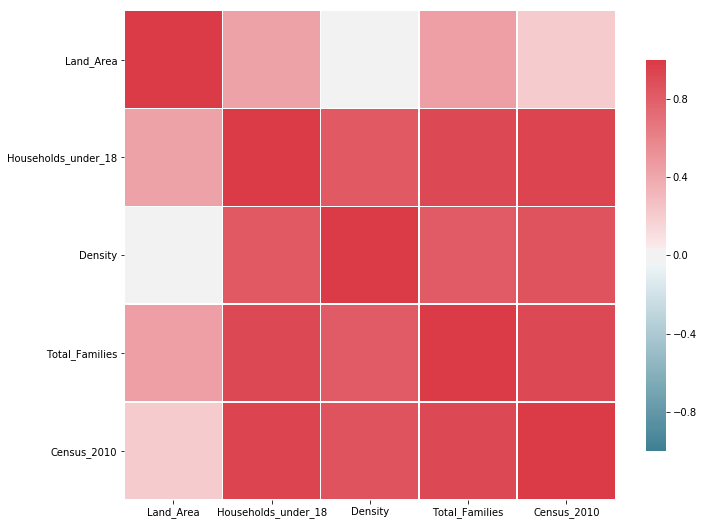

In [0]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

Verdict ? 

*   Les variables `Households_under_18`, `Density`, `Total_Families` et `Census_2010` sont très corrélées entre elles (cf. carré rouge en bas à droite)
*   Nous pouvons donc choisir de garder `Land_Area` et n'importe laquelle des autres variables, pourvu que celle-ci est seule ! 



## iv. Amélioration du modèle linéaire

Maintenant, on peut choisir nos régresseurs ! 

In [0]:
chosen_regressors = ['Land_Area', 'Total_Families']

Répétons les étapes 3 et 4 du processus précédent et tirons-en les conclusions.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(outlier_free_data_frame[chosen_regressors],
                                                    outlier_free_data_frame[target],
                                                    test_size=0.2, random_state=42)
regr.fit(X_train[chosen_regressors], y_train)
predictions_ventes = regr.predict(X_test[chosen_regressors])
erreur_ech_test = np.sqrt(mean_squared_error(predictions_ventes, y_test))
erreur_ech_train = np.sqrt(mean_squared_error(regr.predict(X_train[chosen_regressors]), y_train))

print("Erreur sur l'échantillon d'entrainement : %s" % round(erreur_ech_train))
print("Erreur sur l'échantillon de test : %s" % round(erreur_ech_test))

Erreur sur l'échantillon d'entrainement : 68664.0
Erreur sur l'échantillon de test : 69061.0


Verdict : le modèle sur-apprend beaucoup moins !

## v. Décision finale

On peut maintenant appliquer notre modèle sur les données non-vues par le modèle lors de son apprentissage - à savoir les villes dans lesquelles notre concurrent est déjà présent.

In [0]:
competitors_data = competitors_data.set_index([competitors_data['City'], competitors_data['County']])
already_studied_cities = set(consolidated_data.index.values) & set(competitors_data.index.values)
competitors_data = competitors_data[~competitors_data.index.isin(already_studied_cities)]

In [0]:
## Prédictions ! 
competitors_data['expected_sales'] = regr.predict(competitors_data[chosen_regressors])
resultats = competitors_data.sort_values(by = "expected_sales", ascending=False)['expected_sales']

In [0]:
## And the winner is... ?
resultats.head(1)

City     County
Laramie  Albany    320369.943046
Name: expected_sales, dtype: float64

# B. Construction d'un modèle de classification

Un modèle de classification diffère d'un modèle de régression dans le sens où la variable-cible prend des valeurs **discrètes** ('0', '1', '2'...) et non **continues**. 


## i. Construction de variables binaires

In [0]:
competitors_data = pd.merge(demographics, competitors_sales_city, left_on='City', right_on = 'Physical_city_name')
competitors_data = pd.merge(competitors_data, census_2010, on='City')

rename_var = {
    'Land Area': 'Land_Area',
    'Households with Under 18': 'Households_under_18',
    'Population Density' : 'Density',
    'Total Families' : 'Total_Families',
    'sum_sales_volume': 'City_Sales',
    'city_sales': 'City_Sales'
}
competitors_data = competitors_data.rename(columns = rename_var)
competitors_data = competitors_data.set_index([competitors_data['City'], competitors_data['County']])

In [0]:
print(competitors_data['City_Sales'])

City          County    
Laramie       Albany          76000
Gillette      Campbell      1130000
Saratoga      Carbon          83000
Douglas       Converse        96000
Dubois        Fremont         55000
Lander        Fremont        152197
Torrington    Goshen         876991
Cheyenne      Laramie       1021000
Alpine        Lincoln         70000
Kemmerer      Lincoln         69000
Casper        Natrona        210000
Evansville    Natrona        210000
Wheatland     Platte          77000
Rock Springs  Sweetwater     990000
Jackson       Teton          182000
Evanston      Uinta           89000
Worland       Washakie       169000
Name: City_Sales, dtype: int64


In [0]:
print("Il y a %s villes sur %s qui font plus de 100 millions de chiffre d'affaires" % (
len(np.where(competitors_data['City_Sales'] > 100000)[0]), len(competitors_data)))

Il y a 9 villes sur 17 qui font plus de 100 millions de chiffre d'affaires


Soit ! Faisons en sorte de labelliser les 9 villes ayant moins de 100M en revenus '1' et les autres '0'.

In [0]:
competitors_data['target'] = np.where(competitors_data['City_Sales'] > 100000, 1, 0)
print(competitors_data['target'])

City          County    
Laramie       Albany        0
Gillette      Campbell      1
Saratoga      Carbon        0
Douglas       Converse      0
Dubois        Fremont       0
Lander        Fremont       1
Torrington    Goshen        1
Cheyenne      Laramie       1
Alpine        Lincoln       0
Kemmerer      Lincoln       0
Casper        Natrona       1
Evansville    Natrona       1
Wheatland     Platte        0
Rock Springs  Sweetwater    1
Jackson       Teton         1
Evanston      Uinta         0
Worland       Washakie      1
Name: target, dtype: int64


On veut ensuite intégrer la donnée du *County*, à plusieurs niveaux : suivant le même principe que précédemment, on veut binariser les niveaux. 

In [0]:
## Les features avec lesquelles on avait travaillé précédemment
features = ['Land_Area', 'Households_under_18', 'Density', 'Total_Families',
            'Census_2010']

In [0]:
competitors_data = pd.concat([competitors_data[features],
                              pd.get_dummies(competitors_data['County']),
                              competitors_data['target']],
                             axis = 1)

In [0]:
competitors_data.head()

,,Land_Area,Households_under_18,Density,Total_Families,Census_2010,Albany,Campbell,Carbon,Converse,Fremont,Goshen,Laramie,Lincoln,Natrona,Platte,Sweetwater,Teton,Uinta,Washakie,target
City,County,,,,,,,,,,,,,,,,,,,,
Laramie,Albany,2513.745235,2075,5.19,4668.93,30816,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gillette,Campbell,2748.852900,4052,5.80,7189.43,29087,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Saratoga,Carbon,976.042427,240,0.24,499.23,1690,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Douglas,Converse,1829.465100,832,1.46,1744.08,6120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Dubois,Fremont,437.073505,244,0.21,506.29,971,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## ii. Calibrage d'un modèle d'arbre de classification

Maintenant, l'on peut ré-appliquer les étapes 3 et 4 de la régression. 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(competitors_data.iloc[:,0:-1],
                                                    competitors_data['target'],
                                                    test_size=0.2, random_state=40)

Construisons un modèle d'arbre...

In [0]:
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=42) ## Refaire tourner avec max_depth = 5
clf_tree = clf_tree.fit(X_train, y_train)
y_pred_tree_train = clf_tree.predict(X_train)
y_pred_tree_test = clf_tree.predict(X_test)

In [0]:
## Prédictions sur l'échantillon d'apprentissage
print(y_pred_tree_train)

[1 1 1 1 1 1 0 1 0 1 1 1 1]


In [0]:
## Prédictions sur l'échantillon de test
print(y_pred_tree_test)

[1 1 1 0]


In [0]:
## Ecriture du graphe de l'arbre
export_graphviz(clf_tree, out_file='tree.dot', feature_names=competitors_data.iloc[:,0:-1].columns)

In [0]:
## Conversion du fichier en PDF
from graphviz import Source
s = Source.from_file('tree.dot')
s.view()

'tree.dot.pdf'

## iii. Evaluation du modèle de classification

In [0]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(np.array(y_train), y_pred_tree_train)
print(cm_train)

cm_test = confusion_matrix(np.array(y_test), y_pred_tree_test)
print(cm_test)

[[2 3]
 [0 8]]
[[1 2]
 [0 1]]


In [0]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
print(y_train)
print(y_pred_tree_train)

City        County  
Worland     Washakie    1
Evanston    Uinta       0
Douglas     Converse    0
Casper      Natrona     1
Jackson     Teton       1
Gillette    Campbell    1
Saratoga    Carbon      0
Wheatland   Platte      0
Alpine      Lincoln     0
Lander      Fremont     1
Cheyenne    Laramie     1
Evansville  Natrona     1
Torrington  Goshen      1
Name: target, dtype: int64
[1 1 1 1 1 1 0 1 0 1 1 1 1]


Confusion matrix, without normalization
[[2 3]
 [0 8]]


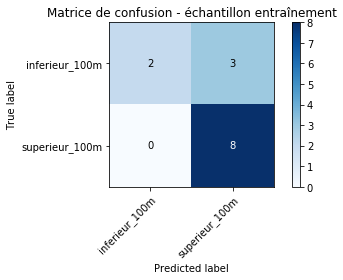

In [0]:
plot_confusion_matrix(y_train, y_pred_tree_train, 
                      classes=np.array(['inferieur_100m', 'superieur_100m']),
                      title='Matrice de confusion - échantillon entraînement')

In [0]:
## Calculer les métriques pour l'échantillon d'entrainement
accuracy = (8+2)/(8+2+3)
precision = 8 / (8 + 3)
recall = 8 / (8 + 0)

print('Accuracy = %s %%' % round(accuracy * 100, 2))
print('Precision = %s %%' % round(precision * 100, 2))
print('Recall = %s %%' % round(recall * 100, 2))

Accuracy = 76.92 %
Precision = 72.73 %
Recall = 100.0 %


In [0]:
## EXERCICE : pour l'échantillon de test ? 

Confusion matrix, without normalization
[[1 2]
 [0 1]]


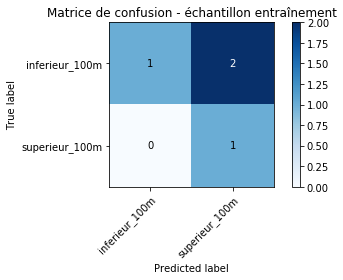

In [0]:
plot_confusion_matrix(y_test, y_pred_tree_test, 
                      classes=np.array(['inferieur_100m', 'superieur_100m']),
                      title='Matrice de confusion - échantillon test')

In [0]:
accuracy = (1+1)/(1+1+2)
precision = 1 / (1 + 2)
recall = 1 / (1 + 0)

print('Accuracy = %s %%' % round(accuracy * 100, 2))
print('Precision = %s %%' % round(precision * 100, 2))
print('Recall = %s %%' % round(recall * 100, 2))

Accuracy = 50.0 %
Precision = 33.33 %
Recall = 100.0 %
